# Análisis Exploratorio de Datos (EDA) en Producción Agrícola

## Exploración de Datos Básicos: Comenzaremos examinando la estructura de los datos, identificando las columnas disponibles y comprendiendo la naturaleza de las variables.

## Importación de librerias necesarias:

In [101]:
import folium
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openpyxl


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

import geopandas as gpd
from shapely.geometry import Point  # Importa la clase Point para crear geometrías de puntos

## A partir del conjunto de datos del archivo estimaciones-agricolas-2020-08.csv se crea un data frame para comenzar la exploracion de los datos:

In [102]:

df_estimaciones = pd.read_csv('estimaciones-agricolas-2020-08.csv', sep=',', encoding='latin-1')



## Pedimos que nos muestre el data frame:

In [103]:
df_estimaciones

,id_provincia,provincia,id_departamento,departamento,id_cultivo,cultivo,id_campaï¿½a,campaï¿½a,sup_sembrada,sup_cosechada,produccion,rendimiento
0,6,Buenos Aires,854,25 de Mayo,1,Ajo,1,1969/1970,3,3,10,3333
1,6,Buenos Aires,854,25 de Mayo,1,Ajo,2,1970/1971,1,1,3,3000
2,6,Buenos Aires,14,Adolfo Gonzales Chaves,1,Ajo,1,1969/1970,15,15,82,5467
3,6,Buenos Aires,14,Adolfo Gonzales Chaves,1,Ajo,2,1970/1971,10,10,55,5500
4,6,Buenos Aires,14,Adolfo Gonzales Chaves,1,Ajo,3,1971/1972,8,8,44,5500
...,...,...,...,...,...,...,...,...,...,...,...,...
143625,54,Misiones,112,San Pedro,31,Yerba mate,46,2014/2015,7975,7905,43478,5500
143626,54,Misiones,112,San Pedro,31,Yerba mate,47,2015/2016,7975,7905,46640,5900
143627,54,Misiones,112,San Pedro,31,Yerba mate,48,2016/2017,8200,8200,33620,4100
143628,54,Misiones,112,San Pedro,31,Yerba mate,49,2017/2018,8787,8787,43054,4900


## Cambiamos el nombre a ciertas columnas para que sean mas facil de escribir y manejar:

In [104]:
# Cambiar el nombre de tres columnas
df_estimaciones.rename(columns={'id_campaï¿½a': 'id_campaña', 'campaï¿½a': 'campaña', 'produccion ': 'produccion'}, inplace=True)


## Obtenemos estadísticas descriptivas sobre las columnas numéricas del conjunto de datos:

In [105]:
df_estimaciones.describe()

,id_provincia,id_departamento,id_cultivo,id_campaña,sup_sembrada,sup_cosechada,produccion,rendimiento
count,143630.000000,143630.000000,143630.000000,143630.000000,1.436300e+05,1.436300e+05,1.436300e+05,143630.000000
mean,34.087029,190.445471,19.295899,22.188596,1.162731e+04,1.013002e+04,3.110532e+04,3533.567235
std,29.300535,228.202917,10.161226,14.897955,3.462306e+04,3.318605e+04,1.228428e+05,5746.583592
min,6.000000,0.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,6.000000,49.000000,11.000000,9.000000,1.500000e+02,5.000000e+01,1.600000e+02,1000.000000
50%,22.000000,98.000000,21.000000,19.000000,1.250000e+03,7.000000e+02,1.600000e+03,1892.000000
75%,54.000000,189.000000,28.000000,35.000000,8.000000e+03,5.500000e+03,1.261675e+04,3512.000000
max,94.000000,882.000000,35.000000,51.000000,1.096100e+06,1.066100e+06,8.620000e+06,300000.000000


## Información general del DataFrame: se obtiene la información general, como el número de filas y columnas, los tipos de datos y si hay valores nulos:

In [106]:
df_estimaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143630 entries, 0 to 143629
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id_provincia     143630 non-null  int64 
 1   provincia        143630 non-null  object
 2   id_departamento  143630 non-null  int64 
 3   departamento     143630 non-null  object
 4   id_cultivo       143630 non-null  int64 
 5   cultivo          143630 non-null  object
 6   id_campaña       143630 non-null  int64 
 7   campaña          143630 non-null  object
 8   sup_sembrada     143630 non-null  int64 
 9   sup_cosechada    143630 non-null  int64 
 10  produccion       143630 non-null  int64 
 11  rendimiento      143630 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 13.1+ MB


### La informacion general indica que los datos en la columna "campaña" son tipo "object", lo que significa que son un cadena de texto u otro tipo no numerico, sin embargo la columna nos muestra dos años separados por el caracter '/'. Si queremos hacer calculos por fechas debemos corregir eso.

## Dividimos la columna campaña en dos columnas y las convertimos a datetime para poder trabajar con fechas:

In [107]:
df_estimaciones[['inicio_campaña', 'fin_campaña']] = df_estimaciones['campaña'].str.split('/', expand=True)
df_estimaciones['inicio_campaña'] = pd.to_datetime(df_estimaciones['inicio_campaña'], format='%Y')
df_estimaciones['fin_campaña'] = pd.to_datetime(df_estimaciones['fin_campaña'], format='%Y') + pd.DateOffset(years=1)

# Extrae el año de las columnas "inicio_campaña" y "fin_campaña"
df_estimaciones['inicio_campaña'] = df_estimaciones['inicio_campaña'].dt.year
df_estimaciones['fin_campaña'] = df_estimaciones['fin_campaña'].dt.year


## Ejecutamos df_estimaciones para ver como quedó el conjunto de datos con las correciones en los nombres de las columnas y el agregado de las columnas con los años de las campañas:

In [108]:
df_estimaciones

,id_provincia,provincia,id_departamento,departamento,id_cultivo,cultivo,id_campaña,campaña,sup_sembrada,sup_cosechada,produccion,rendimiento,inicio_campaña,fin_campaña
0,6,Buenos Aires,854,25 de Mayo,1,Ajo,1,1969/1970,3,3,10,3333,1969,1971
1,6,Buenos Aires,854,25 de Mayo,1,Ajo,2,1970/1971,1,1,3,3000,1970,1972
2,6,Buenos Aires,14,Adolfo Gonzales Chaves,1,Ajo,1,1969/1970,15,15,82,5467,1969,1971
3,6,Buenos Aires,14,Adolfo Gonzales Chaves,1,Ajo,2,1970/1971,10,10,55,5500,1970,1972
4,6,Buenos Aires,14,Adolfo Gonzales Chaves,1,Ajo,3,1971/1972,8,8,44,5500,1971,1973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143625,54,Misiones,112,San Pedro,31,Yerba mate,46,2014/2015,7975,7905,43478,5500,2014,2016
143626,54,Misiones,112,San Pedro,31,Yerba mate,47,2015/2016,7975,7905,46640,5900,2015,2017
143627,54,Misiones,112,San Pedro,31,Yerba mate,48,2016/2017,8200,8200,33620,4100,2016,2018
143628,54,Misiones,112,San Pedro,31,Yerba mate,49,2017/2018,8787,8787,43054,4900,2017,2019


## Estadisticas descriptivas teniendo en cuenta las nuevas columnas:

In [109]:
df_estimaciones.describe()

,id_provincia,id_departamento,id_cultivo,id_campaña,sup_sembrada,sup_cosechada,produccion,rendimiento,inicio_campaña,fin_campaña
count,143630.000000,143630.000000,143630.000000,143630.000000,1.436300e+05,1.436300e+05,1.436300e+05,143630.000000,143630.000000,143630.000000
mean,34.087029,190.445471,19.295899,22.188596,1.162731e+04,1.013002e+04,3.110532e+04,3533.567235,1990.188596,1992.188596
std,29.300535,228.202917,10.161226,14.897955,3.462306e+04,3.318605e+04,1.228428e+05,5746.583592,14.897955,14.897955
min,6.000000,0.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1969.000000,1971.000000
25%,6.000000,49.000000,11.000000,9.000000,1.500000e+02,5.000000e+01,1.600000e+02,1000.000000,1977.000000,1979.000000
50%,22.000000,98.000000,21.000000,19.000000,1.250000e+03,7.000000e+02,1.600000e+03,1892.000000,1987.000000,1989.000000
75%,54.000000,189.000000,28.000000,35.000000,8.000000e+03,5.500000e+03,1.261675e+04,3512.000000,2003.000000,2005.000000
max,94.000000,882.000000,35.000000,51.000000,1.096100e+06,1.066100e+06,8.620000e+06,300000.000000,2019.000000,2021.000000


## Información general del DataFrame, teniendo en cuenta el agregado de las nuevas columnas (inicio_campaña y fin_campaña):

In [110]:
df_estimaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143630 entries, 0 to 143629
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id_provincia     143630 non-null  int64 
 1   provincia        143630 non-null  object
 2   id_departamento  143630 non-null  int64 
 3   departamento     143630 non-null  object
 4   id_cultivo       143630 non-null  int64 
 5   cultivo          143630 non-null  object
 6   id_campaña       143630 non-null  int64 
 7   campaña          143630 non-null  object
 8   sup_sembrada     143630 non-null  int64 
 9   sup_cosechada    143630 non-null  int64 
 10  produccion       143630 non-null  int64 
 11  rendimiento      143630 non-null  int64 
 12  inicio_campaña   143630 non-null  int32 
 13  fin_campaña      143630 non-null  int32 
dtypes: int32(2), int64(8), object(4)
memory usage: 14.2+ MB


## Columnas disponibles:

In [111]:
df_estimaciones.columns

Index(['id_provincia', 'provincia', 'id_departamento', 'departamento',
       'id_cultivo', 'cultivo', 'id_campaña', 'campaña', 'sup_sembrada',
       'sup_cosechada', 'produccion', 'rendimiento', 'inicio_campaña',
       'fin_campaña'],
      dtype='object')

## Conteo de valores únicos por columna



In [112]:
df_estimaciones.nunique()

id_provincia          23
provincia             23
id_departamento      129
departamento         408
id_cultivo            35
cultivo               35
id_campaña            51
campaña               51
sup_sembrada        7760
sup_cosechada       9411
produccion         19306
rendimiento         9303
inicio_campaña        51
fin_campaña           51
dtype: int64

## Muestra una lista de los valores únicos que se encuentran en la columna 'cultivo' del data frame, para conocer todos los diferentes tipos de cultivos que aparecen en esa columna.

In [113]:
df_estimaciones.cultivo.unique()

array(['Ajo', 'Algodï¿½n', 'Alpiste', 'Arroz', 'Avena', 'Banana',
       'Caï¿½a de azï¿½car', 'Cï¿½rtamo', 'Cebada cervecera',
       'Cebada forrajera', 'Cebada total', 'Cebolla total', 'Centeno',
       'Colza', 'Girasol', 'Jojoba', 'Limï¿½n', 'Lino', 'Maï¿½z',
       'Mandarina', 'Manï¿½', 'Mijo', 'Naranja', 'Papa total', 'Pomelo',
       'Poroto seco', 'Soja 1ra', 'Soja 2da', 'Soja total', 'Sorgo',
       'Tï¿½', 'Trigo candeal', 'Trigo total', 'Tung', 'Yerba mate'],
      dtype=object)

<Axes: xlabel='cultivo'>

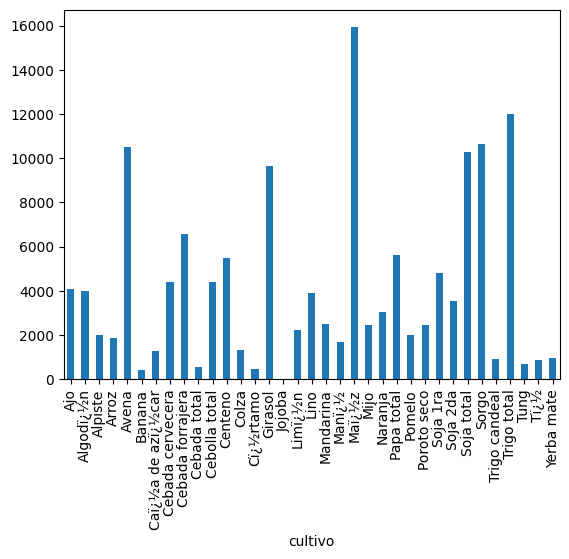

In [114]:

df_estimaciones.groupby('cultivo').count()['produccion'].plot(kind='bar')


## Análisis de Tendencias Agrícolas: Realiza un análisis exploratorio de datos para identificar tendencias en la producción agrícola a lo largo de diferentes años y regiones.

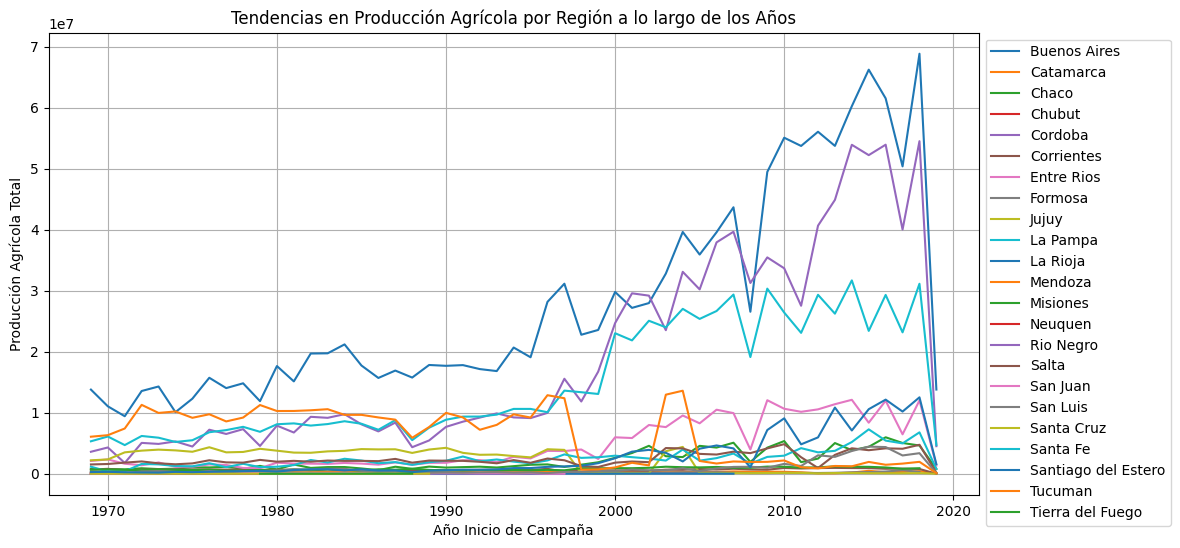

In [115]:

# Filtrar filas con años válidos y eliminar las que no cumplen el formato
df_estimaciones = df_estimaciones[df_estimaciones['inicio_campaña'].notnull()]

# Calcular la producción total por año y región
tendencias = df_estimaciones.groupby(['inicio_campaña', 'provincia'])['produccion'].sum().reset_index()

# Visualizar tendencias a lo largo de los años
plt.figure(figsize=(12, 6))
for provincia in tendencias['provincia'].unique():
    data = tendencias[tendencias['provincia'] == provincia]
    plt.plot(data['inicio_campaña'], data['produccion'], label=provincia)

plt.xlabel('Año Inicio de Campaña')
plt.ylabel('Producción Agrícola Total')
plt.title('Tendencias en Producción Agrícola por Región a lo largo de los Años')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()




##  Realiza una regresión lineal simple utilizando los datos de las columnas 'sup_cosechada' y 'produccion' del DataFrame df_estimaciones. El propósito principal de este código es estimar una relación lineal entre estas dos variables y visualizar los resultados.

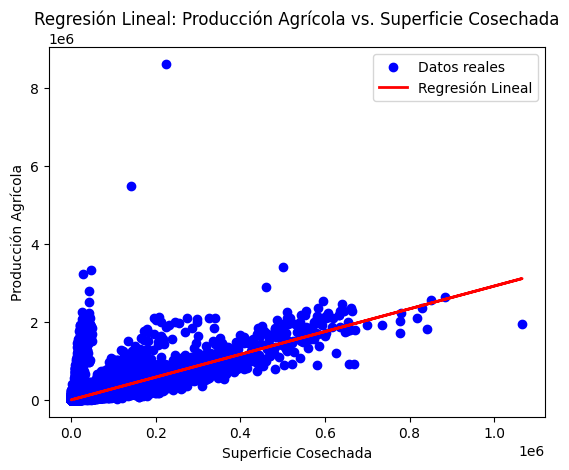

Coeficiente de la pendiente: 2.919197363036532
Intercepto: 1533.7875362112027


In [116]:

# Seleccionar la variable independiente (sup_cosechada) y la variable dependiente (produccion)
X = df_estimaciones['sup_cosechada'].values.reshape(-1, 1)
y = df_estimaciones['produccion'].values

# Crear un modelo de regresión lineal
modelo_regresion = LinearRegression()

# Ajustar el modelo a los datos
modelo_regresion.fit(X, y)

# Hacer predicciones
y_pred = modelo_regresion.predict(X)

# Visualizar los resultados
plt.scatter(X, y, color='blue', label='Datos reales')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regresión Lineal')
plt.xlabel('Superficie Cosechada')
plt.ylabel('Producción Agrícola')
plt.title('Regresión Lineal: Producción Agrícola vs. Superficie Cosechada')
plt.legend()
plt.show()

# Imprimir los coeficientes de la regresión
print("Coeficiente de la pendiente:", modelo_regresion.coef_[0])
print("Intercepto:", modelo_regresion.intercept_)


## Se realiza un análisis de producción agrícola por Provincia y se visualizan aquellos con la mayor producción.

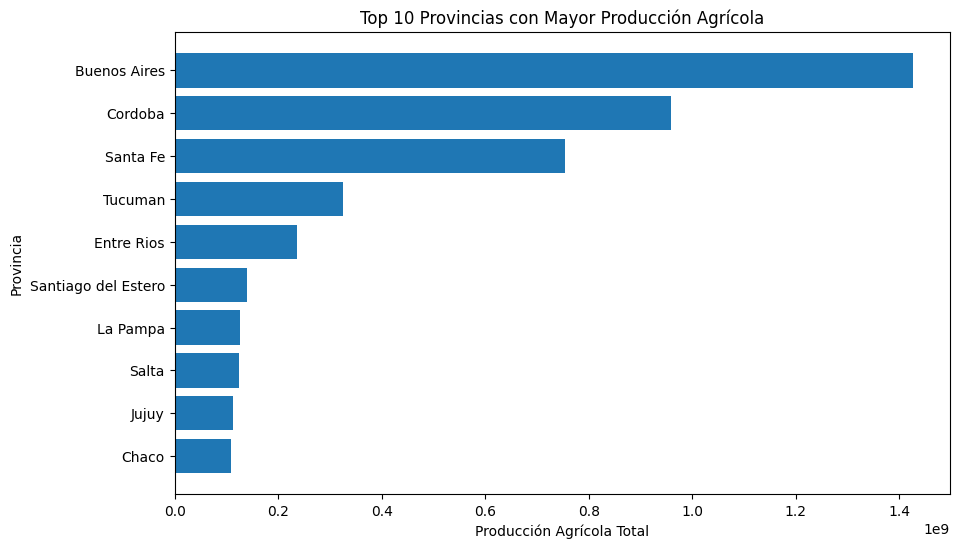

In [117]:
# Agrupa los datos por departamento y calcula la producción agrícola total para cada Departamento
produccion_por_provincia = df_estimaciones.groupby('provincia')['produccion'].sum().reset_index()

# Ordena los Departamentos por producción agrícola de mayor a menor
produccion_por_provincia = produccion_por_provincia.sort_values(by='produccion', ascending=False)

# Visualiza los Departamentos con la mayor producción agrícola (por ejemplo, las 10 principales)
top_n_provincias = 10
plt.figure(figsize=(10, 6))
plt.barh(produccion_por_provincia['provincia'].head(top_n_provincias), produccion_por_provincia['produccion'].head(top_n_provincias))
plt.xlabel('Producción Agrícola Total')
plt.ylabel('Provincia')
plt.title(f'Top {top_n_provincias} Provincias con Mayor Producción Agrícola')
plt.gca().invert_yaxis()  # Invierte el eje y para mostrar la comuna con la mayor producción en la parte superior
plt.show()

## Se realiza un análisis de producción agrícola por Departamento y se visualizan aquellos con la mayor producción.

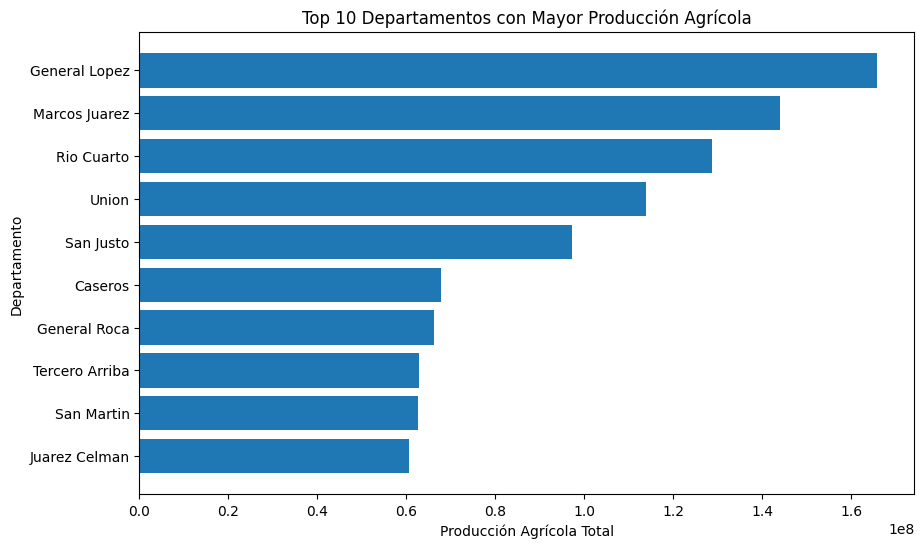

In [118]:


# Agrupa los datos por departamento y calcula la producción agrícola total para cada Departamento
produccion_por_departamento = df_estimaciones.groupby('departamento')['produccion'].sum().reset_index()

# Ordena los Departamentos por producción agrícola de mayor a menor
produccion_por_departamento = produccion_por_departamento.sort_values(by='produccion', ascending=False)

# Visualiza los Departamentos con la mayor producción agrícola (por ejemplo, las 10 principales)
top_n_departamentos = 10
plt.figure(figsize=(10, 6))
plt.barh(produccion_por_departamento['departamento'].head(top_n_departamentos), produccion_por_departamento['produccion'].head(top_n_departamentos))
plt.xlabel('Producción Agrícola Total')
plt.ylabel('Departamento')
plt.title(f'Top {top_n_departamentos} Departamentos con Mayor Producción Agrícola')
plt.gca().invert_yaxis()  # Invierte el eje y para mostrar la comuna con la mayor producción en la parte superior
plt.show()


## Examinar la variación de rendimiento de cultivos, en las diferentes Provincias seleccionadas (en este caso se seleccionaron Buenos Aires, Córdoba y Santa Fe), a lo largo de los años e identificar aquellos con un rendimiento constante o fluctuante:

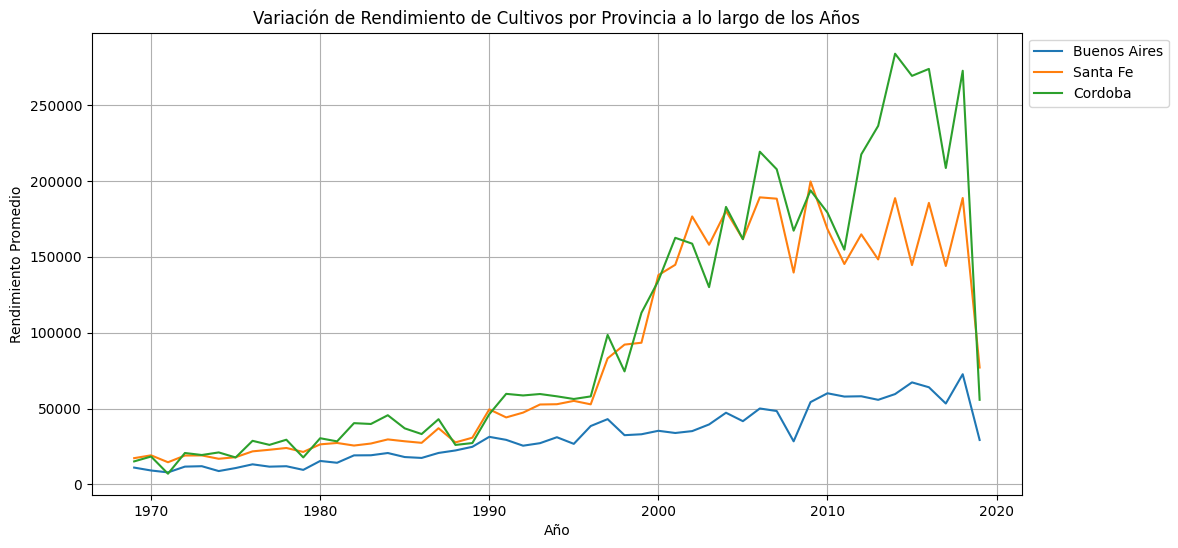

In [119]:
# Agrupa los datos por Provincia y año y calcula el rendimiento promedio
rendimiento_por_provincia = df_estimaciones.groupby(['provincia', 'inicio_campaña'])['produccion'].mean().reset_index()

# Visualiza la variación de rendimiento para algunos Provincia seleccionadas
provincia_seleccionadas = ['Buenos Aires', 'Santa Fe', 'Cordoba']  # Provincias que se quieren analizar
plt.figure(figsize=(12, 6))

for provincia in provincia_seleccionadas:
    data_provincia = rendimiento_por_provincia[rendimiento_por_provincia['provincia'] == provincia]
    plt.plot(data_provincia['inicio_campaña'], data_provincia['produccion'], label=provincia)

plt.xlabel('Año')
plt.ylabel('Rendimiento Promedio')
plt.title('Variación de Rendimiento de Cultivos por Provincia a lo largo de los Años')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

# Examinar la variación de rendimiento de cultivos en diferentes Departamentos a lo largo de los años e identificar aquellos con un rendimiento constante o fluctuante (en éste caso se eligieron los tres con mayor produccion agricola):

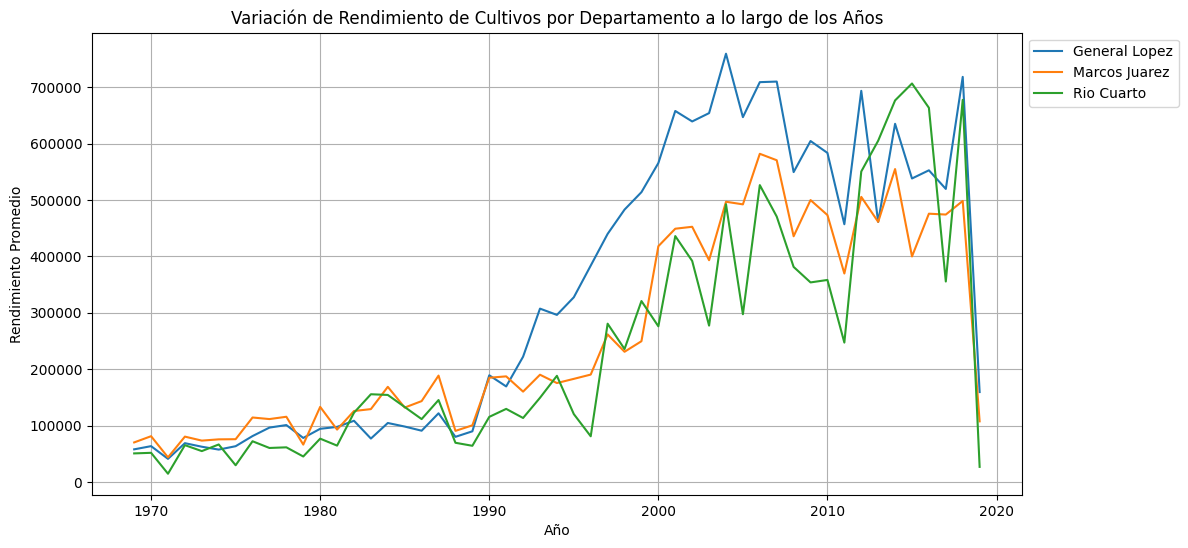

In [120]:


# Agrupa los datos por cdepartamento y año y calcula el rendimiento promedio
rendimiento_por_departamento = df_estimaciones.groupby(['departamento', 'inicio_campaña'])['produccion'].mean().reset_index()

# Visualiza la variación de rendimiento para algunos Departamentos seleccionadas
departamentos_seleccionados = ['General Lopez','Marcos Juarez', 'Rio Cuarto']  # departamentos que se quieren analizar
plt.figure(figsize=(12, 6))

for departamento in departamentos_seleccionados:
    data_departamento = rendimiento_por_departamento[rendimiento_por_departamento['departamento'] == departamento]
    plt.plot(data_departamento['inicio_campaña'], data_departamento['produccion'], label=departamento)

plt.xlabel('Año')
plt.ylabel('Rendimiento Promedio')
plt.title('Variación de Rendimiento de Cultivos por Departamento a lo largo de los Años')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


In [121]:
df_estimaciones['departamento']

0                     25 de Mayo
1                     25 de Mayo
2         Adolfo Gonzales Chaves
3         Adolfo Gonzales Chaves
4         Adolfo Gonzales Chaves
                   ...          
143625                 San Pedro
143626                 San Pedro
143627                 San Pedro
143628                 San Pedro
143629                 San Pedro
Name: departamento, Length: 143630, dtype: object

# Determinar cuál es el cultivo con el mayor crecimiento a lo largo de los años en los datos agrícolas, análisis que calcula la tasa de crecimiento anual para cada cultivo y luego identificar cuál tiene la tasa más alta.

In [122]:

# Agrupa los datos por cultivo y año y calcula la producción agrícola total
produccion_por_cultivo = df_estimaciones.groupby(['cultivo', 'inicio_campaña'])['produccion'].sum().reset_index()

# Calcula la tasa de crecimiento anual para cada cultivo
produccion_por_cultivo['crecimiento'] = produccion_por_cultivo.groupby('cultivo')['produccion'].pct_change() * 100

# Encuentra el cultivo con la tasa de crecimiento más alta en promedio, excluyendo NaN e infinitos
cultivo_con_mayor_crecimiento = produccion_por_cultivo.groupby('cultivo')['crecimiento'].mean().idxmax()

# Obtiene la tasa de crecimiento promedio para ese cultivo, excluyendo NaN e infinitos
mayor_crecimiento_promedio = produccion_por_cultivo.groupby('cultivo')['crecimiento'].mean().loc[cultivo_con_mayor_crecimiento]

# Imprime el resultado
print(f"El cultivo con el mayor crecimiento promedio es '{cultivo_con_mayor_crecimiento}' con un crecimiento promedio del {mayor_crecimiento_promedio:.2f}%.")


El cultivo con el mayor crecimiento promedio es 'Cï¿½rtamo' con un crecimiento promedio del inf%.


# Determinar cuál es el cultivo con el menor crecimiento a lo largo de los años en los datos agrícolas, análisis que calcula la tasa de crecimiento anual para cada cultivo para luego identificar cuál tiene la tasa más alta.

In [123]:

# Encuentra el cultivo con la tasa de crecimiento más baja en promedio, excluyendo NaN e infinitos
cultivo_con_menor_crecimiento = produccion_por_cultivo.groupby('cultivo')['crecimiento'].mean().idxmin()

# Obtiene la tasa de crecimiento promedio para ese cultivo, excluyendo NaN e infinitos
menor_crecimiento_promedio = produccion_por_cultivo.groupby('cultivo')['crecimiento'].mean().loc[cultivo_con_menor_crecimiento]

# Imprime el resultado
print(f"El cultivo con el menor crecimiento promedio es '{cultivo_con_menor_crecimiento}' con un crecimiento promedio del {menor_crecimiento_promedio:.2f}%.")


El cultivo con el menor crecimiento promedio es 'Lino' con un crecimiento promedio del 1.14%.


# Calcular la media de produccion para cada cultivo

In [124]:


# Para calcular la media de producción para cada cultivo, simplemente agrupa los datos y calcula la media.
media_de_produccion_por_cultivo = df_estimaciones.groupby('cultivo')['produccion'].mean().reset_index()

# Renombra la columna resultante para mayor claridad
media_de_produccion_por_cultivo.rename(columns={'produccion': 'media_de_produccion'}, inplace=True)

# Imprime el DataFrame resultante
print(media_de_produccion_por_cultivo)


               cultivo  media_de_produccion
0                  Ajo           468.583110
1            Algodï¿½n          7488.679771
2              Alpiste           836.191017
3                Arroz         21291.520403
4                Avena          2320.606735
5               Banana         13709.672854
6   Caï¿½a de azï¿½car        338963.696690
7     Cebada cervecera         10669.487232
8     Cebada forrajera           197.557212
9         Cebada total         27500.750865
10       Cebolla total          2666.063946
11             Centeno          1223.078793
12               Colza           769.643239
13           Cï¿½rtamo          2109.272727
14             Girasol         16243.591809
15              Jojoba           692.800000
16             Limï¿½n          5606.763702
17                Lino          3470.022057
18           Mandarina          3134.384337
19              Manï¿½         13678.946961
20              Maï¿½z         51491.107517
21                Mijo          